In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
rate_scenario_table = load_scenario_table(datadir / "contamination_rate_estimation.csv")
inspection_scenario_table = load_scenario_table(datadir / "inspection_scenarios.csv")
consignment_scenario_table = load_scenario_table(datadir / "consignment_scenarios.csv")

In [5]:
fitted_contamination_rate = rate_scenario_table[0:4]
adjusted_contamination_rate = rate_scenario_table[4:8]

In [61]:
num_consignments = 6082
fitted_contamination_rate_results = run_scenarios(
    config=basic_config,
    scenario_table=fitted_contamination_rate,
    seed=42,
    num_simulations=5,
    num_consignments=num_consignments,
    detailed=False,
)

Running scenario: contamination rate 1
Running scenario: contamination rate 2
Running scenario: contamination rate 3
Running scenario: contamination rate 4


In [62]:
df_fitted = save_scenario_result_to_pandas(
    fitted_contamination_rate_results,
    config_columns=[
        "name",
        "consignment name",
        "inspection name",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "contamination/clustered/distribution",
        "contamination/clustered/max_contaminated_units_per_cluster",
        "inspection/unit",
    ],
    result_columns=[
        "true_contamination_rate",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
    ],
)

In [63]:
df_fitted['consignment failure rate'] = df_fitted["intercepted"] / num_consignments
df_fitted

,name,consignment name,inspection name,contamination/contamination_rate/parameters,contamination/arrangement,contamination/clustered/distribution,contamination/clustered/max_contaminated_units_per_cluster,inspection/unit,true_contamination_rate,false_neg,intercepted,total_missed_contaminants,total_intercepted_contaminants,interception_rate
0,contamination rate 1,random item beta,box hypergeometric 0.1 random,"[1.296, 384.027]",random,,,boxes,0.000658,565.8,102.2,595692.0,125112.0,0.016804
1,contamination rate 2,clustered item beta,box hypergeometric 0.1 random,"[1.296, 384.027]",clustered,random,2,boxes,0.000646,551.4,106.0,568429.0,115320.0,0.017428
2,contamination rate 3,random item beta,item hypergeometric 0.1 random,"[1.296, 384.027]",random,,,items,0.000658,559.8,108.2,597684.0,123120.0,0.017790
3,contamination rate 4,clustered item beta,item hypergeometric 0.1 random,"[1.296, 384.027]",clustered,random,2,items,0.000646,557.0,100.4,572109.0,111640.0,0.016508


In [86]:
adjusted_contamination_rate_results = run_scenarios(
    config=basic_config,
    scenario_table=adjusted_contamination_rate,
    seed=42,
    num_simulations=5,
    num_consignments=num_consignments,
    detailed=False,
)

Running scenario: contamination rate 5
Running scenario: contamination rate 6
Running scenario: contamination rate 7
Running scenario: contamination rate 8


In [87]:
df_adjusted = save_scenario_result_to_pandas(
    adjusted_contamination_rate_results,
    config_columns=[
        "name",
        "consignment name",
        "inspection name",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "contamination/clustered/distribution",
        "contamination/clustered/max_contaminated_units_per_cluster",
        "inspection/unit",
    ],
    result_columns=[
        "true_contamination_rate",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
    ],
)

In [88]:
df_adjusted['consignment failure rate'] = df_adjusted["intercepted"] / num_consignments
df_adjusted

,name,consignment name,inspection name,contamination/contamination_rate/parameters,contamination/arrangement,contamination/clustered/distribution,contamination/clustered/max_contaminated_units_per_cluster,inspection/unit,true_contamination_rate,false_neg,intercepted,total_missed_contaminants,total_intercepted_contaminants,interception_rate
0,contamination rate 5,random item beta,box hypergeometric 0.1 random,"[6.095, 828.883]",random,,,boxes,0.001820,909.8,288.2,1184417.6,384880.8,0.047386
1,contamination rate 6,clustered item beta,box hypergeometric 0.1 random,"[6.095, 828.883]",clustered,random,2,boxes,0.001858,932.2,278.8,1290120.0,310440.0,0.045840
2,contamination rate 7,random item beta,item hypergeometric 0.1 random,"[6.095, 828.883]",random,,,items,0.001820,925.6,272.4,1264252.8,305045.6,0.044788
3,contamination rate 8,clustered item beta,item hypergeometric 0.1 random,"[6.095, 828.883]",clustered,random,2,items,0.001858,937.6,273.4,1248320.0,352240.0,0.044952


In [89]:
df_contamination_rates = df_fitted.append(df_adjusted)
df_contamination_rates.index = range(len(df_contamination_rates))

In [90]:
# Format dataframe
column_names = ["consignment name", "inspection name", "beta parameters", "contaminant arrangement", "cluster distribution", "infested boxes per cluster", "actual contamination rate (mean)", "consignment failure rate"]
df_contamination_pretty = df_contamination_rates.iloc[:,[1,2,3,4,5,6,8,13]]
# contaminate_validation_df_pretty.iloc[:,5] = contaminate_validation_df_pretty.iloc[:,5].astype(str)

# beta_parameters = contaminate_validation_df.iloc[12:16,7]
# contaminate_validation_df_pretty.iloc[12:16,5] = beta_parameters
df_contamination_pretty.columns = column_names
df_contamination_pretty.iloc[:,6] = df_contamination_pretty.iloc[:,6].round(decimals=4)
df_contamination_pretty.iloc[:,7] = df_contamination_pretty.iloc[:,7].round(decimals=4)
df_contamination_pretty

,consignment name,inspection name,beta parameters,contaminant arrangement,cluster distribution,infested boxes per cluster,actual contamination rate (mean),interception rate
0,random item beta,box hypergeometric 0.1 random,"[1.296, 384.027]",random,,,0.0007,0.0168
1,clustered item beta,box hypergeometric 0.1 random,"[1.296, 384.027]",clustered,random,2,0.0006,0.0174
2,random item beta,item hypergeometric 0.1 random,"[1.296, 384.027]",random,,,0.0007,0.0178
3,clustered item beta,item hypergeometric 0.1 random,"[1.296, 384.027]",clustered,random,2,0.0006,0.0165
4,random item beta,box hypergeometric 0.1 random,"[6.095, 828.883]",random,,,0.0018,0.0474
5,clustered item beta,box hypergeometric 0.1 random,"[6.095, 828.883]",clustered,random,2,0.0019,0.0458
6,random item beta,item hypergeometric 0.1 random,"[6.095, 828.883]",random,,,0.0018,0.0448
7,clustered item beta,item hypergeometric 0.1 random,"[6.095, 828.883]",clustered,random,2,0.0019,0.0450


In [6]:
num_consignments = 6082
inspection_scenario_results = run_scenarios(
    config=basic_config,
    scenario_table=inspection_scenario_table,
    seed=42,
    num_simulations=1,
    num_consignments=num_consignments,
    detailed=False,
)


Running scenario: inspection scenario 13
Running scenario: inspection scenario 14
Running scenario: inspection scenario 15
Running scenario: inspection scenario 16
Running scenario: inspection scenario 11
Running scenario: inspection scenario 12
Running scenario: inspection scenario 5
Running scenario: inspection scenario 6
Running scenario: inspection scenario 17
Running scenario: inspection scenario 18


In [7]:
df_inspections = save_scenario_result_to_pandas(
    inspection_scenario_results,
    config_columns=[
        "name",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/cluster/cluster_selection",

    ],
    result_columns=[
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
    ],
)

In [8]:
df_inspections['consignment failure rate'] = df_inspections["intercepted"] / num_consignments
contaminated_consignments = df_inspections["false_neg"] + df_inspections["intercepted"]
df_inspections["inspection success rate"] = df_inspections["intercepted"] / contaminated_consignments
df_inspections

,name,inspection/unit,inspection/sample_strategy,inspection/proportion/value,inspection/hypergeometric/detection_level,inspection/selection_strategy,inspection/cluster/cluster_selection,true_contamination_rate,max_missed_contamination_rate,avg_missed_contamination_rate,...,avg_boxes_opened_completion,avg_boxes_opened_detection,avg_items_inspected_completion,avg_items_inspected_detection,false_neg,intercepted,total_missed_contaminants,total_intercepted_contaminants,consignment failure rate,inspection success rate
0,inspection scenario 7,items,hypergeometric,,0.05,random,,0.001873,0.025000,0.008167,...,20.853009,18.977803,56.614600,54.277211,727.0,499.0,923800.0,633800.0,0.082045,0.407015
1,inspection scenario 8,items,hypergeometric,,0.05,convenience,,0.001873,0.040000,0.009272,...,1.000000,1.000000,56.614600,56.442946,1208.0,18.0,1513600.0,44000.0,0.002960,0.014682
2,inspection scenario 9,items,hypergeometric,,0.05,cluster,interval,0.001873,0.040000,0.009248,...,2.518744,2.512496,56.614600,56.492930,1187.0,39.0,1499800.0,57800.0,0.006412,0.031811
3,inspection scenario 10,items,hypergeometric,,0.05,cluster,random,0.001873,0.040000,0.009282,...,2.805985,2.802532,56.586649,56.519895,1205.0,21.0,1466000.0,91600.0,0.003453,0.017129
4,inspection scenario 1,items,hypergeometric,,0.1,random,,0.001873,0.040000,0.008765,...,13.841993,13.294147,28.415653,27.799737,953.0,273.0,1295000.0,262600.0,0.044887,0.222675
5,inspection scenario 2,items,hypergeometric,,0.1,convenience,,0.001873,0.040000,0.009272,...,1.000000,1.000000,28.415653,28.332785,1208.0,18.0,1513600.0,44000.0,0.002960,0.014682
6,inspection scenario 3,items,hypergeometric,,0.1,cluster,interval,0.001873,0.040000,0.009275,...,1.836074,1.833114,28.415653,28.389017,1206.0,20.0,1510800.0,46800.0,0.003288,0.016313
7,inspection scenario 4,items,hypergeometric,,0.1,cluster,random,0.001873,0.040000,0.009263,...,1.919434,1.917955,28.413022,28.399704,1208.0,18.0,1550000.0,7600.0,0.002960,0.014682
8,inspection scenario 13,items,proportion,0.02,,random,,0.001873,0.021739,0.011897,...,185.219829,37.584018,753.700921,152.196975,16.0,1210.0,3200.0,1554400.0,0.198948,0.986949
9,inspection scenario 14,items,proportion,0.02,,convenience,,0.001873,0.040000,0.009335,...,4.428313,3.902170,753.700921,647.002631,1151.0,75.0,981600.0,576000.0,0.012331,0.061175


In [9]:
# Format dataframe
column_names = ["name", "inspection unit", "sample strategy", "sample parameter", "selection strategy", "cluster selection", "avg contamination rate", "max missed contamination rate", "avg missed contamination rate", "max intercepted contamination rate", "avg intercepted contamination rate", "boxes opened completion", "boxes opened detection", "items inspected completion", "items inspected detection", "missed", "intercepted", "missed contaminants", "intercepted contamininants", "consignment failure rate", "inspection success rate", "sample size method", "selection method"]


In [13]:

df_inspections_pretty = df_inspections.loc[:, df_inspections.columns != 'inspection/hypergeometric/detection_level']
hypergeometric_parameters = df_inspections.iloc[[0,1,2,3,4,5,6,7,12,13,14,15],4]
df_inspections_pretty.iloc[[0,1,2,3,4,5,6,7,12,13,14,15],3] = hypergeometric_parameters
df_inspections_pretty.iloc[:,3] = df_inspections_pretty.iloc[:,3].astype(str)

df_inspections_pretty["sample size method"] = df_inspections_pretty[['inspection/sample_strategy', 'inspection/proportion/value']].agg(' '.join, axis=1)
df_inspections_pretty["selection method"] = df_inspections_pretty[["inspection/unit", 'inspection/selection_strategy', 'inspection/cluster/cluster_selection']].agg(' '.join, axis=1)

df_inspections_pretty.columns = column_names
df_inspections_pretty.iloc[:,6:11] = df_inspections_pretty.iloc[:,6:11].round(decimals=4)
df_inspections_pretty.iloc[:,11:19] = df_inspections_pretty.iloc[:,11:19].astype(int)
df_inspections_pretty.iloc[:,19:21] = df_inspections_pretty.iloc[:,19:21].round(decimals=4)
df_inspections_pretty.columns
df_inspections_pretty.iloc[:,[0,1,21,22,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

,name,inspection unit,sample size method,selection method,avg contamination rate,max missed contamination rate,avg missed contamination rate,max intercepted contamination rate,avg intercepted contamination rate,boxes opened completion,boxes opened detection,items inspected completion,items inspected detection,missed,intercepted,missed contaminants,intercepted contamininants,consignment failure rate,inspection success rate
0,inspection scenario 7,items,hypergeometric 0.05,items random,0.0019,0.0250,0.0082,0.0400,0.0109,20,18,56,54,727,499,923800,633800,0.0820,0.4070
1,inspection scenario 8,items,hypergeometric 0.05,items convenience,0.0019,0.0400,0.0093,0.0179,0.0108,1,1,56,56,1208,18,1513600,44000,0.0030,0.0147
2,inspection scenario 9,items,hypergeometric 0.05,items cluster interval,0.0019,0.0400,0.0092,0.0238,0.0107,2,2,56,56,1187,39,1499800,57800,0.0064,0.0318
3,inspection scenario 10,items,hypergeometric 0.05,items cluster random,0.0019,0.0400,0.0093,0.0169,0.0100,2,2,56,56,1205,21,1466000,91600,0.0035,0.0171
4,inspection scenario 1,items,hypergeometric 0.1,items random,0.0019,0.0400,0.0088,0.0294,0.0111,13,13,28,27,953,273,1295000,262600,0.0449,0.2227
5,inspection scenario 2,items,hypergeometric 0.1,items convenience,0.0019,0.0400,0.0093,0.0179,0.0108,1,1,28,28,1208,18,1513600,44000,0.0030,0.0147
6,inspection scenario 3,items,hypergeometric 0.1,items cluster interval,0.0019,0.0400,0.0093,0.0179,0.0105,1,1,28,28,1206,20,1510800,46800,0.0033,0.0163
7,inspection scenario 4,items,hypergeometric 0.1,items cluster random,0.0019,0.0400,0.0093,0.0224,0.0114,1,1,28,28,1208,18,1550000,7600,0.0030,0.0147
8,inspection scenario 13,items,proportion 0.02,items random,0.0019,0.0217,0.0119,0.0400,0.0093,185,37,753,152,16,1210,3200,1554400,0.1989,0.9869
9,inspection scenario 14,items,proportion 0.02,items convenience,0.0019,0.0400,0.0093,0.0179,0.0087,4,3,753,647,1151,75,981600,576000,0.0123,0.0612


In [14]:
colors = {"hypergeometric 0.1": "#1f78b4", "hypergeometric 0.05": "#a6cee3", "proportion 0.02":"#b2df8a"}
patch_1 = mpatches.Patch(color="#a6cee3", label="hypergeometric 0.05")
patch_2 = mpatches.Patch(color="#1f78b4", label="hypergeometric 0.1")
patch_3 = mpatches.Patch(color="#b2df8a", label="proportion 0.02")

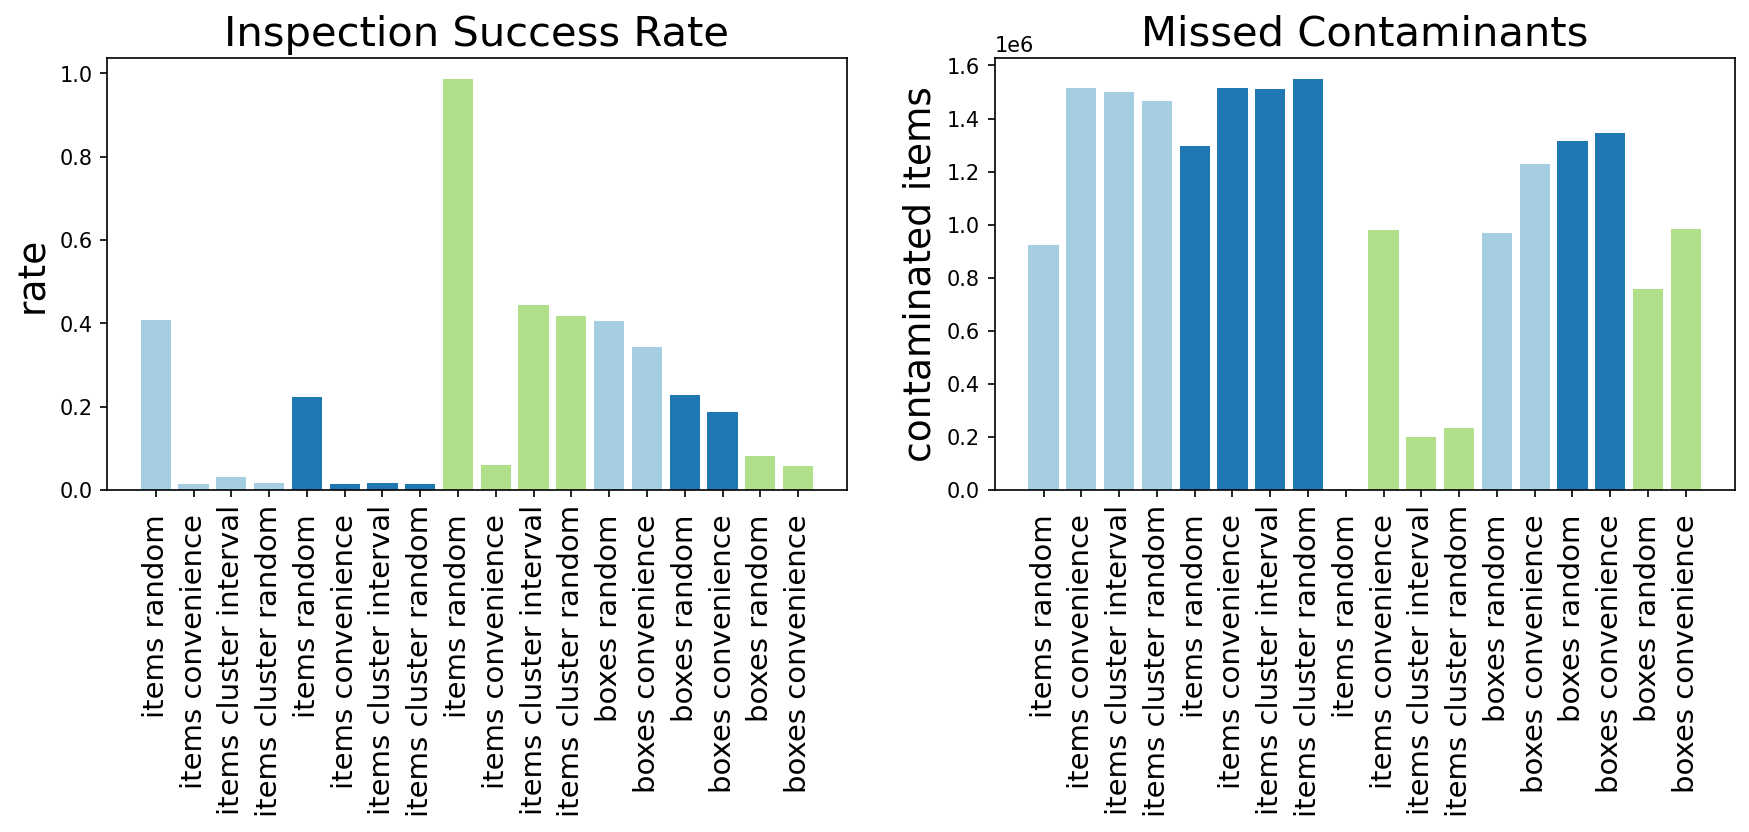

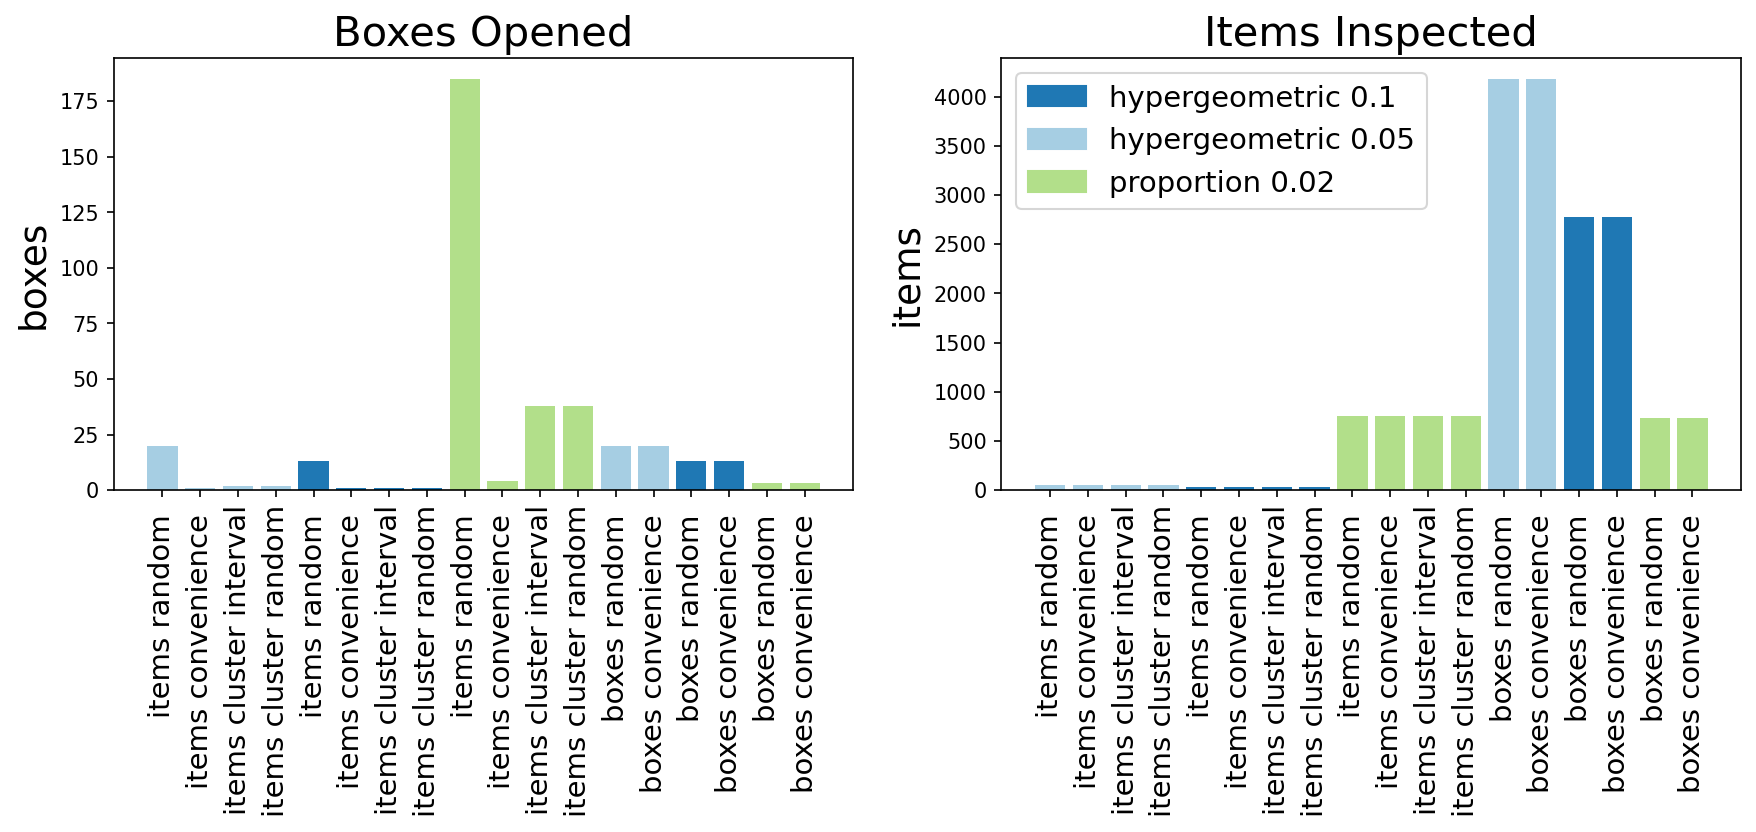

In [23]:
plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(121)
plt.bar(df_inspections_pretty["name"], df_inspections_pretty["inspection success rate"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Inspection Success Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
plt.xticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], rotation='vertical', fontsize=14)
plt.subplot(122)
plt.bar(df_inspections_pretty["name"], df_inspections_pretty["missed contaminants"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Missed Contaminants", fontsize=20)
plt.ylabel("contaminated items", fontsize=18)
plt.xticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], rotation='vertical', fontsize=14)
plt.subplots_adjust(bottom=0.4)
plt.savefig("inspection_scenario_plots_1.png")
plt.show()

plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(121)
plt.bar(df_inspections_pretty["name"], df_inspections_pretty["boxes opened completion"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Boxes Opened", fontsize=20)
plt.ylabel("boxes", fontsize=18)
plt.xticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], rotation='vertical', fontsize=14)
plt.subplot(122)
plt.bar(df_inspections_pretty["name"], df_inspections_pretty["items inspected completion"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Items Inspected", fontsize=20)
plt.ylabel("items", fontsize=18)
plt.legend(handles=[patch_1,patch_2,patch_3], loc = "upper left", fontsize=14)
plt.xticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], rotation='vertical', fontsize=14)
plt.subplots_adjust(bottom=0.4)
plt.savefig("inspection_scenario_plots_2.png")
plt.show()



In [5]:
num_consignments = 6082
consignment_scenario_results = run_scenarios(
    config=basic_config,
    scenario_table=consignment_scenario_table,
    seed=42,
    num_simulations=1,
    num_consignments=num_consignments,
    detailed=False,
)

Running scenario: consignment scenarios 1
Running scenario: consignment scenarios 2
Running scenario: consignment scenarios 3
Running scenario: consignment scenarios 4
Running scenario: consignment scenarios 5
Running scenario: consignment scenarios 6
Running scenario: consignment scenarios 7
Running scenario: consignment scenarios 8
Running scenario: consignment scenarios 9
Running scenario: consignment scenarios 10
Running scenario: consignment scenarios 11
Running scenario: consignment scenarios 12
Running scenario: consignment scenarios 13
Running scenario: consignment scenarios 14
Running scenario: consignment scenarios 15


In [6]:
df_consignments = save_scenario_result_to_pandas(
    consignment_scenario_results,
    config_columns=[
        "name",
        "consignment name",
        "consignment/boxes/min",
        "consignment/boxes/max",
        "consignment/items_per_box/default",
        "contamination/contamination_unit",
        "contamination/contamination_rate/distribution",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "contamination/clustered/distribution",
        "contamination/clustered/max_contaminated_units_per_cluster",
        "contamination/clustered/random/max_cluster_item_width",
    ],
    result_columns=[
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
    ],
)

In [7]:
df_consignments['consignment failure rate'] = df_consignments["intercepted"] / num_consignments
contaminated_consignments = df_consignments["false_neg"] + df_consignments["intercepted"]
df_consignments["inspection success rate"] = df_consignments["intercepted"] / contaminated_consignments
df_consignments["contaminated_consignments"] = contaminated_consignments

In [8]:
# Format dataframe
column_names = ["name", "consignment name", "min boxes", "max boxes", "items per box", "contamination unit", "contamination distribution", "contamination parameters", "contaminant arrangement", "cluster distribution", "max contaminated units per cluster", "cluster width", "avg contamination rate", "max missed contamination rate", "avg missed contamination rate", "max intercepted contamination rate", "avg intercepted contamination rate", "boxes opened completion", "boxes opened detection", "items inspected completion", "items inspected detection", "missed", "intercepted", "missed contaminants", "intercepted contamininants", "consignment failure rate", "inspection success rate", "contaminated_consignments"]


In [18]:

df_consignments_pretty = df_consignments
#hypergeometric_parameters = df_inspections.iloc[[0,1,2,3,4,5,6,7,12,13,14,15],4]
#df_inspections_pretty.iloc[[0,1,2,3,4,5,6,7,12,13,14,15],3] = hypergeometric_parameters
#df_inspections_pretty.iloc[:,3] = df_inspections_pretty.iloc[:,3].astype(str)

#df_inspections_pretty["sample size method"] = df_inspections_pretty[['inspection/sample_strategy', 'inspection/proportion/value']].agg(' '.join, axis=1)
#df_inspections_pretty["selection method"] = df_inspections_pretty[["inspection/unit", 'inspection/selection_strategy', 'inspection/cluster/cluster_selection']].agg(' '.join, axis=1)

df_consignments_pretty.columns = column_names
#df_inspections_pretty.iloc[:,6:11] = df_inspections_pretty.iloc[:,6:11].round(decimals=4)
#df_inspections_pretty.iloc[:,11:19] = df_inspections_pretty.iloc[:,11:19].astype(int)
#df_inspections_pretty.iloc[:,19:21] = df_inspections_pretty.iloc[:,19:21].round(decimals=4)
#df_inspections_pretty.columns
df_consignments_pretty = df_consignments_pretty.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,17,19,23,25,26,27]]
df_cargo_config = df_consignments_pretty.loc[0:3,:]
df_contamination_scenarios = df_consignments_pretty.loc[4:14,:]
#df_contaminant_arrangement = df_consignments_pretty.loc[10:14,:]

In [10]:
colors = {"hypergeometric 0.1": "#1f78b4", "hypergeometric 0.05": "#a6cee3", "proportion 0.02":"#b2df8a"}
patch_1 = mpatches.Patch(color="#1f78b4", label="hypergeometric 0.1")
patch_2 = mpatches.Patch(color="#a6cee3", label="hypergeometric 0.05")
patch_3 = mpatches.Patch(color="#b2df8a", label="proportion 0.02")

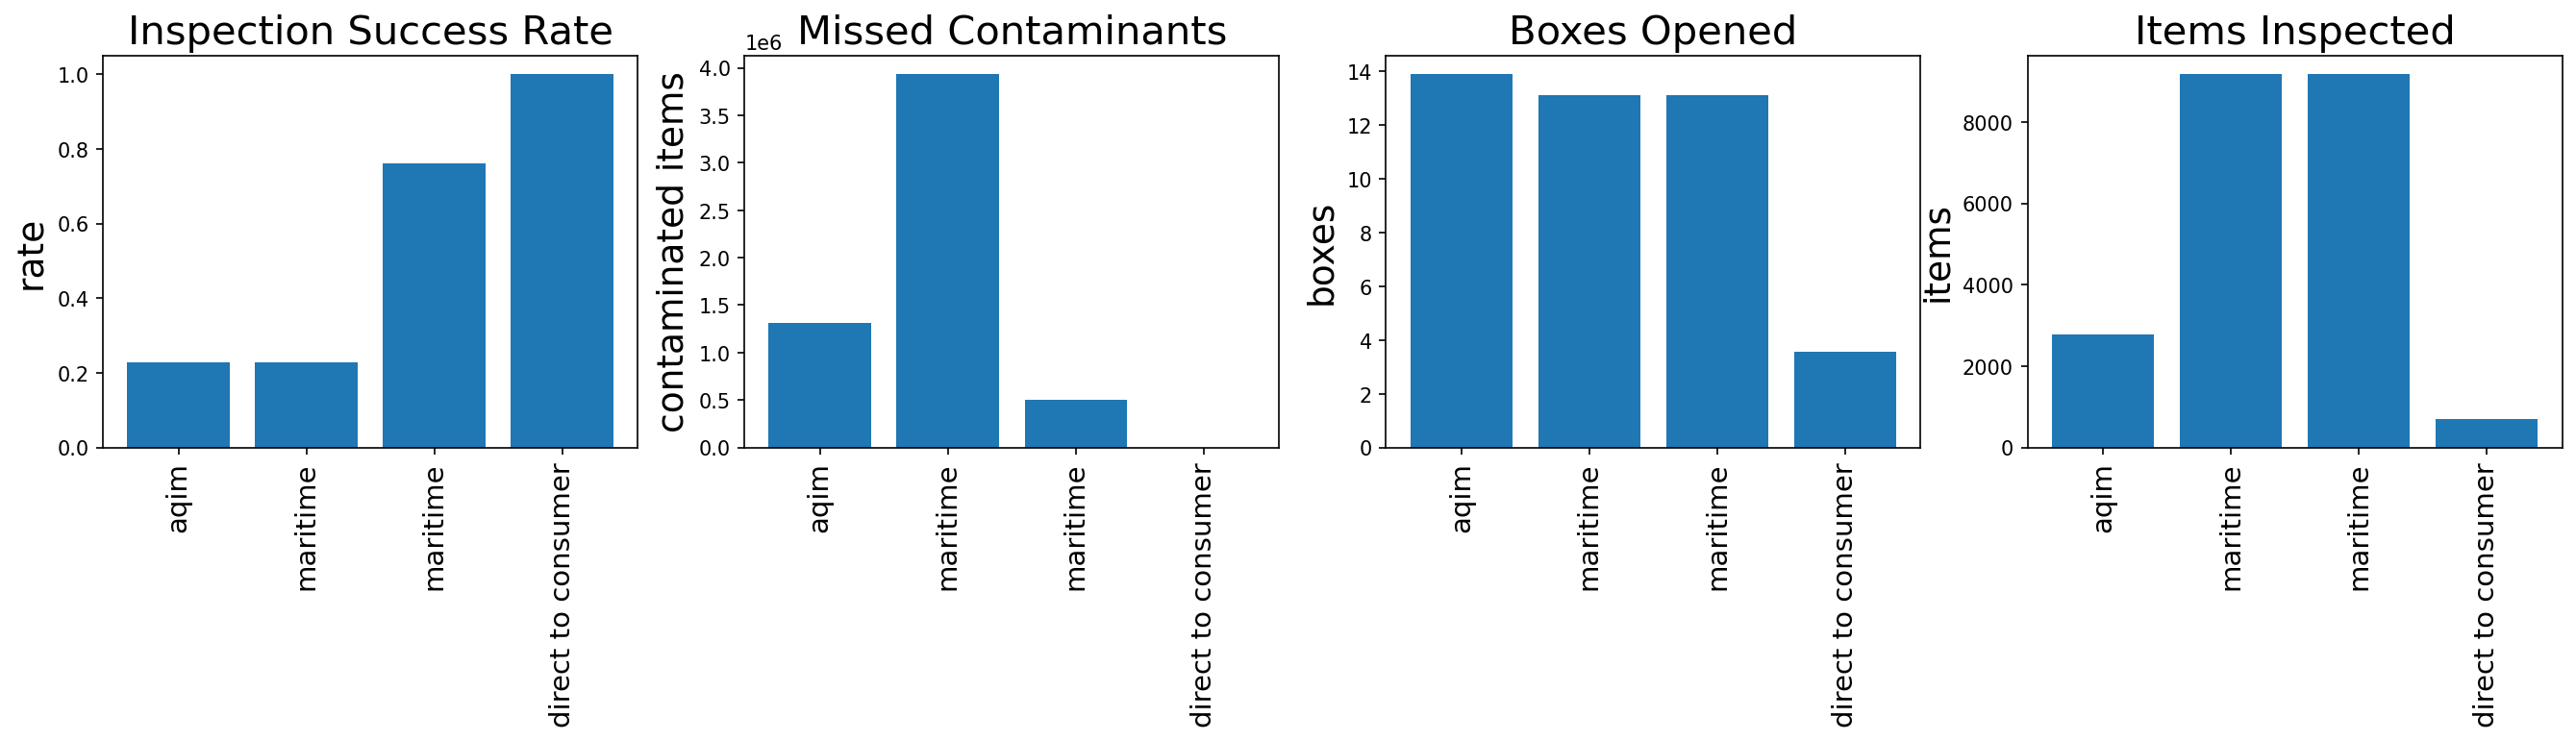

In [42]:
plt.figure(figsize=(22, 4), dpi=150)
plt.subplot(141)
plt.bar(df_cargo_config["name"], df_cargo_config["inspection success rate"])
plt.title("Inspection Success Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
plt.xticks(ticks=np.arange(4),labels=df_cargo_config["consignment name"], rotation='vertical', fontsize=14)
plt.subplot(142)
plt.bar(df_cargo_config["name"], df_cargo_config["missed contaminants"])
plt.title("Missed Contaminants", fontsize=20)
plt.ylabel("contaminated items", fontsize=18)
plt.xticks(ticks=np.arange(4),labels=df_cargo_config["consignment name"], rotation='vertical', fontsize=14)
#plt.subplots_adjust(bottom=0.4)
# plt.savefig("cargo_config_scenario_plots_1.png")
# plt.show()

#plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(143)
plt.bar(df_cargo_config["name"], df_cargo_config["boxes opened completion"])
plt.title("Boxes Opened", fontsize=20)
plt.ylabel("boxes", fontsize=18)
plt.xticks(ticks=np.arange(4),labels=df_cargo_config["consignment name"], rotation='vertical', fontsize=14)
plt.subplot(144)
plt.bar(df_cargo_config["name"], df_cargo_config["items inspected completion"])
plt.title("Items Inspected", fontsize=20)
plt.ylabel("items", fontsize=18)
#plt.legend(handles=[patch_1,patch_2,patch_3], loc = "upper left", fontsize=14)
plt.xticks(ticks=np.arange(4),labels=df_cargo_config["consignment name"], rotation='vertical', fontsize=14)
plt.subplots_adjust(bottom=0.2)
plt.savefig("cargo_config_scenario_plots.png")
plt.show()



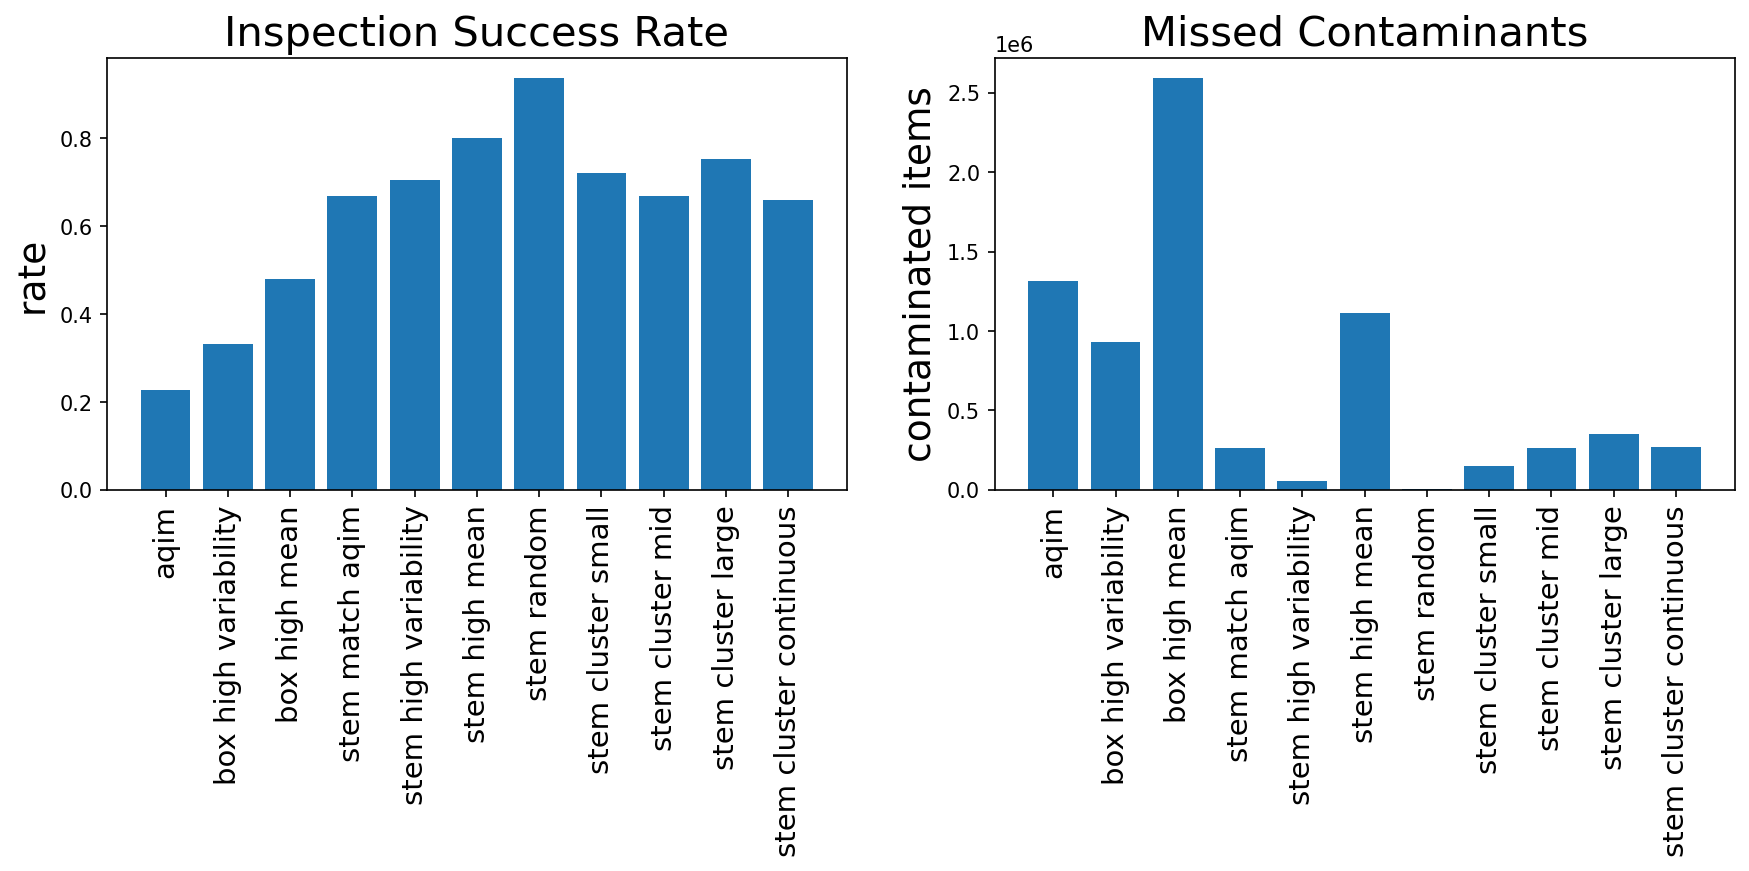

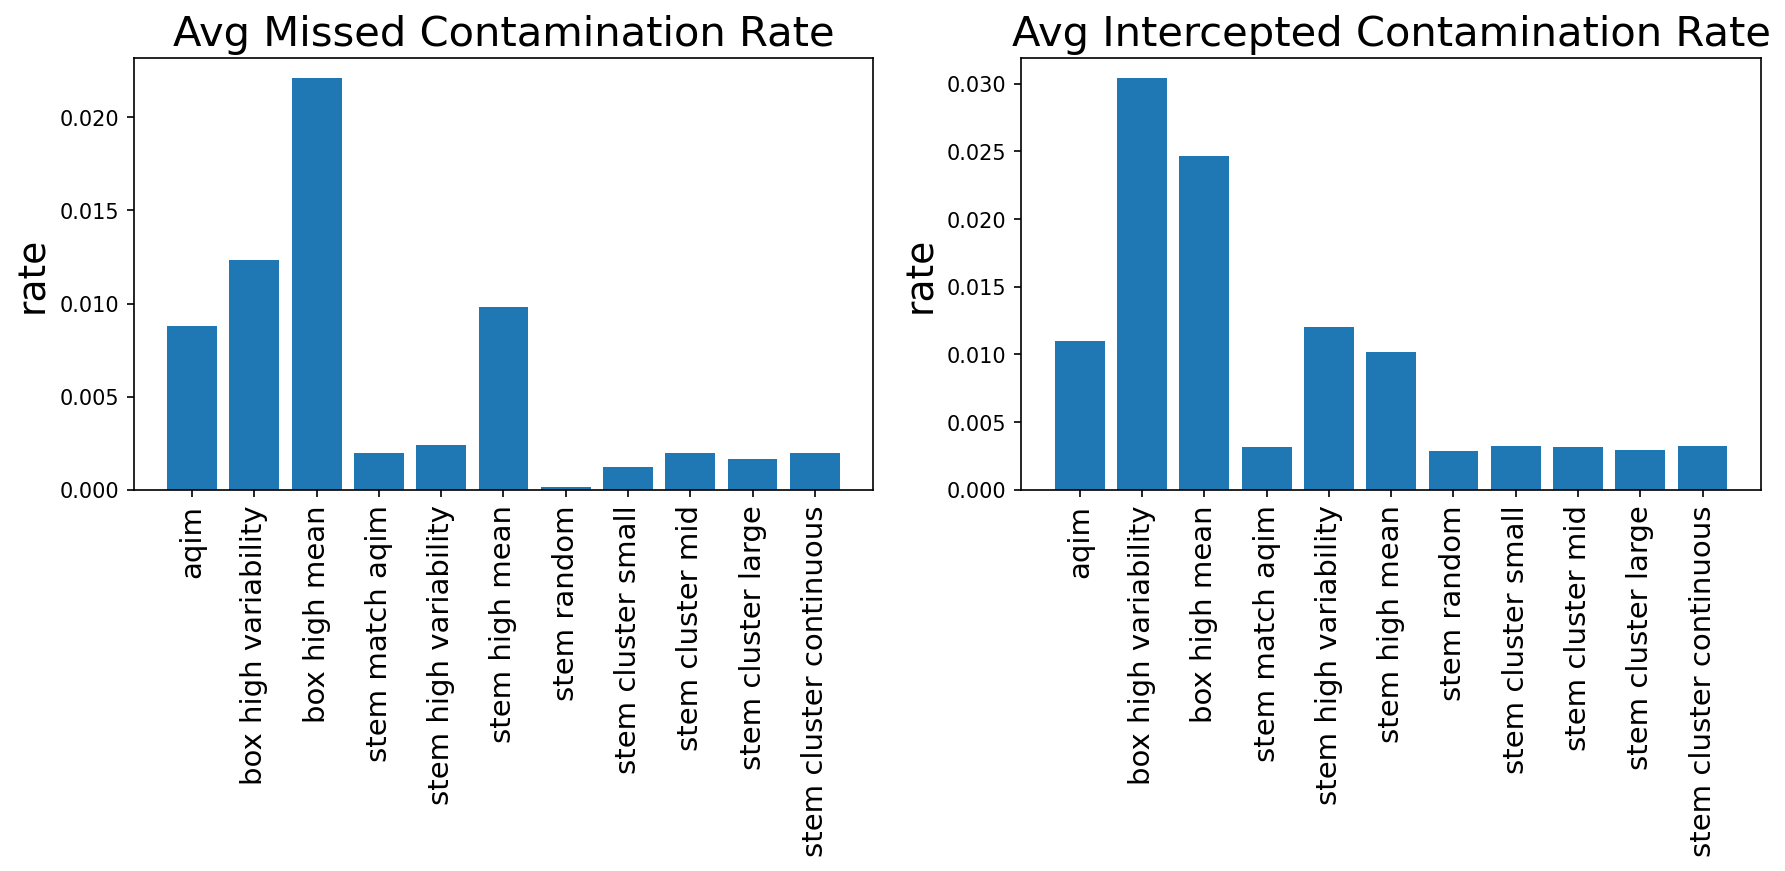

In [37]:
plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(121)
plt.bar(df_contamination_scenarios["name"], df_contamination_scenarios["inspection success rate"])
plt.title("Inspection Success Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
plt.xticks(ticks=np.arange(11),labels=df_contamination_scenarios["consignment name"], rotation='vertical', fontsize=14)
plt.subplot(122)
plt.bar(df_contamination_scenarios["name"], df_contamination_scenarios["missed contaminants"])
plt.title("Missed Contaminants", fontsize=20)
plt.ylabel("contaminated items", fontsize=18)
plt.xticks(ticks=np.arange(11),labels=df_contamination_scenarios["consignment name"], rotation='vertical', fontsize=14)
plt.subplots_adjust(bottom=0.4)
plt.savefig("contamination_scenario_plots_1.png")
plt.show()

plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(121)
plt.bar(df_contamination_scenarios["name"], df_contamination_scenarios["avg missed contamination rate"])
plt.title("Avg Missed Contamination Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
plt.xticks(ticks=np.arange(11),labels=df_contamination_scenarios["consignment name"], rotation='vertical', fontsize=14)
plt.subplot(122)
plt.bar(df_contamination_scenarios["name"], df_contamination_scenarios["avg intercepted contamination rate"])
plt.title("Avg Intercepted Contamination Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
#plt.legend(handles=[patch_1,patch_2,patch_3], loc = "upper left", fontsize=14)
plt.xticks(ticks=np.arange(11),labels=df_contamination_scenarios["consignment name"], rotation='vertical', fontsize=14)
plt.subplots_adjust(bottom=0.4)
plt.savefig("contamination_scenario_plots_2.png")
plt.show()



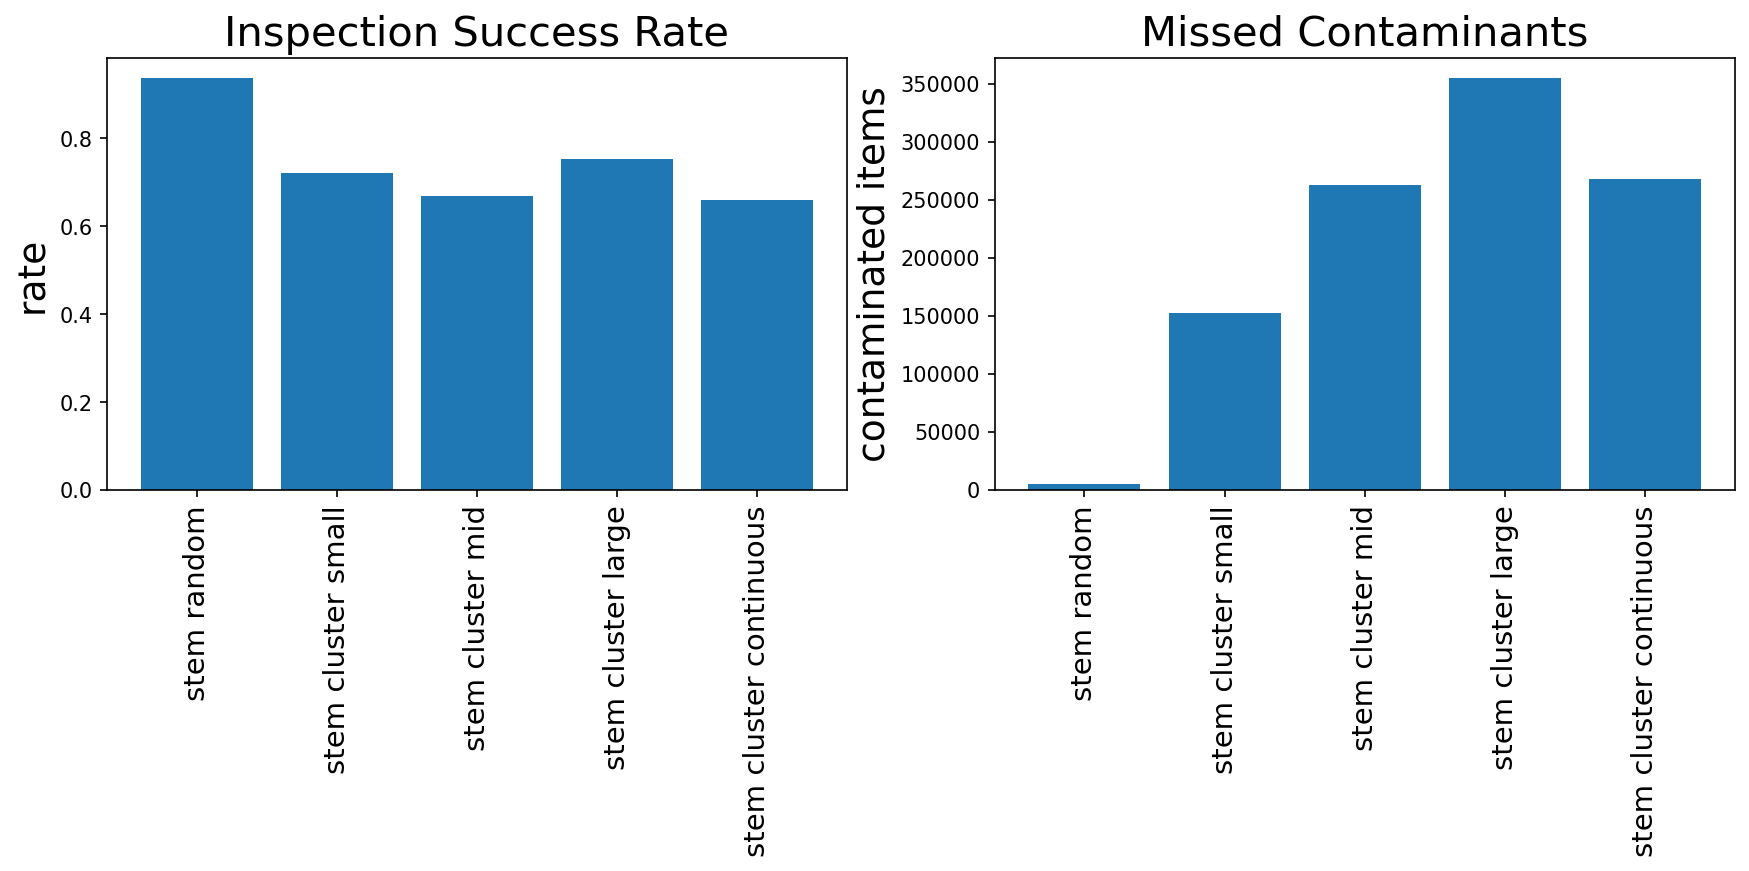

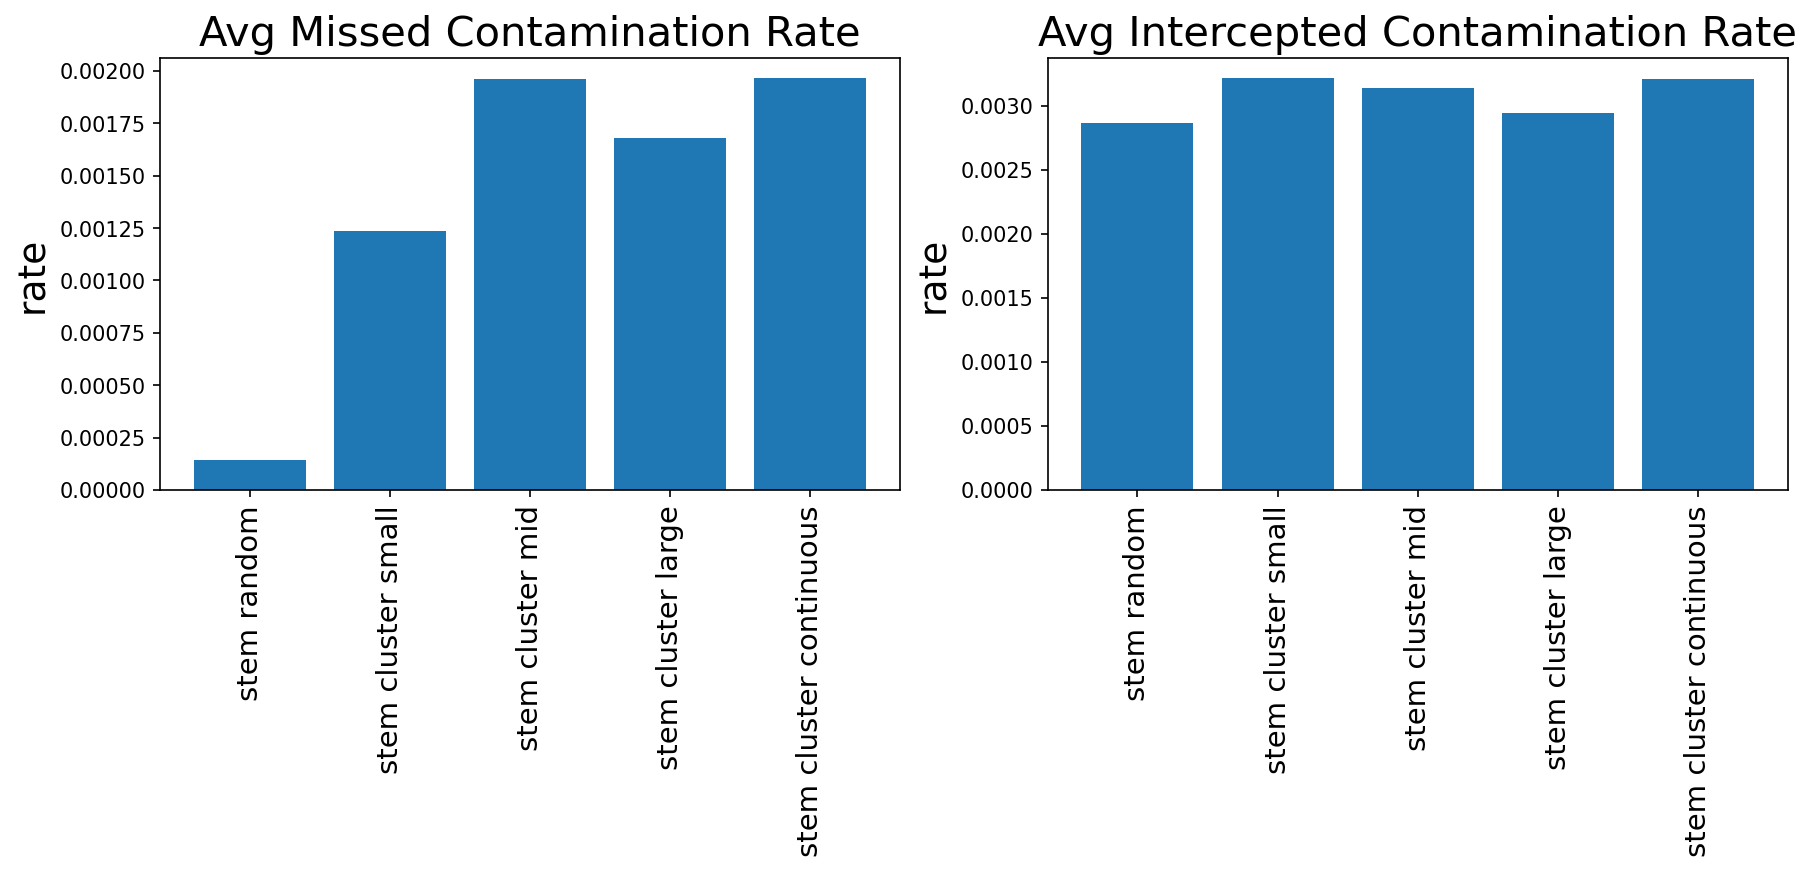

In [17]:
plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(121)
plt.bar(df_contaminant_arrangement["name"], df_contaminant_arrangement["inspection success rate"])
plt.title("Inspection Success Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
plt.xticks(ticks=np.arange(5),labels=df_contaminant_arrangement["consignment name"], rotation='vertical', fontsize=14)
plt.subplot(122)
plt.bar(df_contaminant_arrangement["name"], df_contaminant_arrangement["missed contaminants"])
plt.title("Missed Contaminants", fontsize=20)
plt.ylabel("contaminated items", fontsize=18)
plt.xticks(ticks=np.arange(5),labels=df_contaminant_arrangement["consignment name"], rotation='vertical', fontsize=14)
plt.subplots_adjust(bottom=0.4)
plt.savefig("contaminant_arrangement_scenario_plots_1.png")
plt.show()

plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(121)
plt.bar(df_contaminant_arrangement["name"], df_contaminant_arrangement["avg missed contamination rate"])
plt.title("Avg Missed Contamination Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
plt.xticks(ticks=np.arange(5),labels=df_contaminant_arrangement["consignment name"], rotation='vertical', fontsize=14)
plt.subplot(122)
plt.bar(df_contaminant_arrangement["name"], df_contaminant_arrangement["avg intercepted contamination rate"])
plt.title("Avg Intercepted Contamination Rate", fontsize=20)
plt.ylabel("rate", fontsize=18)
#plt.legend(handles=[patch_1,patch_2,patch_3], loc = "upper left", fontsize=14)
plt.xticks(ticks=np.arange(5),labels=df_contaminant_arrangement["consignment name"], rotation='vertical', fontsize=14)
plt.subplots_adjust(bottom=0.4)
plt.savefig("contaminant_arrangement_plots_2.png")
plt.show()

